# <span style="font-family: Garamond;"> <font color=#993399 > __Método das diferenças finitas__ </span>

Eduarda Veiga Carvalho - 220054

Ilum - Escola de Ciência

CNPEM - Centro Nacional de Pesquisa em Energia e Materiais 

# <span style="font-family: Garamond;"> <font color=#993399> __Importações__</span>

In [36]:
import numpy as np #manipulação de arrays e cálculos numéricos.
import matplotlib.pyplot as plt #criar gráficos
from mpl_toolkits.mplot3d import Axes3D #plotar gráficos em 3D

## 🔥| Equação do Calor

Passo de tempo 0: [0.    0.081 0.128 0.147 0.144 0.125 0.096 0.063 0.032 0.009 0.   ]
Passo de tempo 1: [0.    0.064 0.114 0.136 0.136 0.12  0.094 0.064 0.036 0.016 0.   ]
Passo de tempo 2: [0.    0.057 0.1   0.125 0.128 0.115 0.092 0.065 0.04  0.018 0.   ]
Passo de tempo 3: [0.     0.05   0.091  0.114  0.12   0.11   0.09   0.066  0.0415 0.02
 0.    ]
Passo de tempo 4: [0.      0.0455  0.082   0.1055  0.112   0.105   0.088   0.06575 0.043
 0.02075 0.     ]
Passo de tempo 5: [0.       0.041    0.0755   0.097    0.10525  0.1      0.085375 0.0655
 0.04325  0.0215   0.      ]
Passo de tempo 6: [0.        0.03775   0.069     0.090375  0.0985    0.0953125 0.08275
 0.0643125 0.0435    0.021625  0.       ]
Passo de tempo 7: [0.         0.0345     0.0640625  0.08375    0.09284375 0.090625
 0.0798125  0.063125   0.04296875 0.02175    0.        ]
Passo de tempo 8: [0.         0.03203125 0.059125   0.07845313 0.0871875  0.08632813
 0.076875   0.06139063 0.0424375  0.02148438 0.        ]
Passo de t

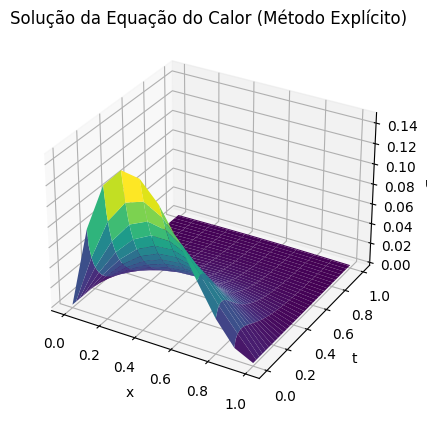

In [37]:
# Implementação da solução numérica da equação do calor
def equacao_calor_explicita(κ, dx, dt, u_initial, passos_no_tempo):
    """
    Resolve numericamente a equação do calor unidimensional usando o método explícito das diferenças finitas.
    
    Args:
        κ (float): Coeficiente de difusão.
        dx (float): Passo espacial.
        dt (float): Passo de tempo.
        u_initial (numpy.ndarray): Condição inicial como um array numpy.
        passos_no_tempo (int): Número de passos de tempo.
        
    Returns:
        numpy.ndarray: Array contendo a solução da equação do calor.
    """
    # Calcula o número de pontos na malha
    num_points = len(u_initial)
    
    # Calcula o valor de alpha
    alpha = κ * dt / (dx**2)
    
    # Cria um array para armazenar a solução
    u_solution = np.zeros((passos_no_tempo + 1, num_points))
    u_solution[0] = u_initial
    
    # Loop para a resolução da equação do calor
    for n in range(passos_no_tempo):
        for i in range(1, num_points - 1):
            u_solution[n+1, i] = alpha * u_solution[n, i+1] + (1 - 2*alpha) * u_solution[n, i] + alpha * u_solution[n, i-1]
        u_solution[n+1, 0] = 0
        u_solution[n+1, -1] = 0
    
    return u_solution

# Parâmetros do problema
'''Essas variáveis definem os parâmetros do problema, como o passo espacial dx, o passo temporal dt e o número de passos de tempo num_steps'''
κ = 0.5
dx = 0.1
dt = 0.01
passos_no_tempo = 100

# Condição inicial

'''A variável x é um array numpy que representa a malha espacial, variando de 0 a 1 com passo dx.'''
x = np.arange(0, 1 + dx, dx)

'''A variável u_initial é um array numpy que representa a condição inicial da equação do calor, calculada como x * (1 - x)**2.'''
u_initial = x * (1 - x)**2

# Resolução da equação do calor utilizando o método explícito
u_solution = equacao_calor_explicita(κ, dx, dt, u_initial, passos_no_tempo)

# Impressão da solução
for n in range(passos_no_tempo + 1):
    print(f"Passo de tempo {n}: {u_solution[n]}")

# Criação do grid de pontos para o gráfico 3D
t = np.arange(0, passos_no_tempo + 1) * dt
X, T = np.meshgrid(x, t)

# Criação do gráfico 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, T, u_solution, cmap='viridis')

# Configurações do gráfico
ax.set_xlabel('x')
ax.set_ylabel('t')
ax.set_zlabel('u')
ax.set_title('Solução da Equação do Calor (Método Explícito)')

# Exibição do gráfico
plt.show()

### 📈| Comparação em 2D para três valores de K

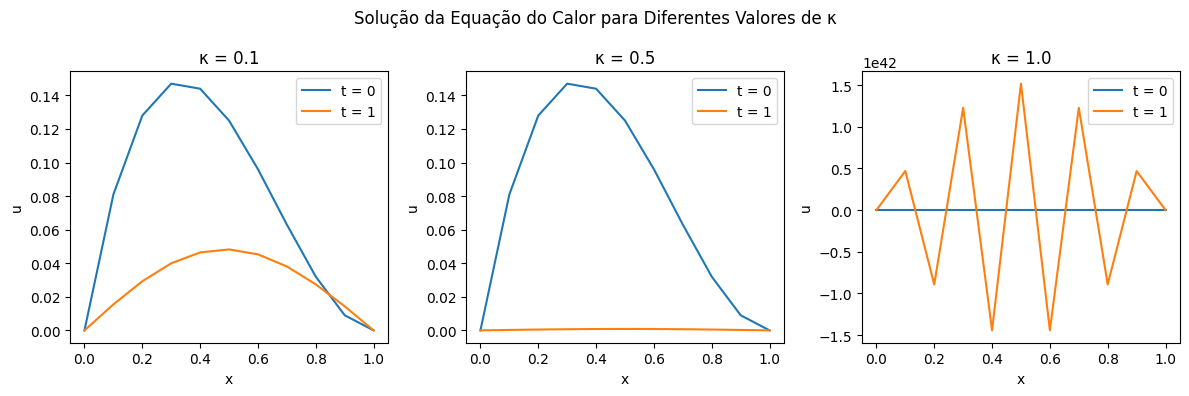

In [38]:
import numpy as np
import matplotlib.pyplot as plt

def equacao_calor_explicita_2d(κ, dx, dt, u_initial, passos_no_tempo):
    """
    Resolve numericamente a equação do calor unidimensional usando o método explícito das diferenças finitas.
    
    Args:
        κ (float): Coeficiente de difusão.
        dx (float): Passo espacial.
        dt (float): Passo de tempo.
        u_initial (numpy.ndarray): Condição inicial como um array numpy.
        passos_no_tempo (int): Número de passos de tempo.
        
    Returns:
        numpy.ndarray: Array contendo a solução da equação do calor.
    """
    # Calcula o número de pontos na malha
    num_points = len(u_initial)
    
    # Calcula o valor de alpha
    alpha = κ * dt / (dx**2)
    
    # Cria um array para armazenar a solução
    u_solution = np.zeros((passos_no_tempo + 1, num_points))
    u_solution[0] = u_initial
    
    # Loop para a resolução da equação do calor
    for n in range(passos_no_tempo):
        for i in range(1, num_points - 1):
            u_solution[n+1, i] = alpha * u_solution[n, i+1] + (1 - 2*alpha) * u_solution[n, i] + alpha * u_solution[n, i-1]
        u_solution[n+1, 0] = 0
        u_solution[n+1, -1] = 0
    
    return u_solution

# Parâmetros do problema
dx = 0.1
dt = 0.01
passos_no_tempo= 100

# Condição inicial
x = np.arange(0, 1 + dx, dx)
u_initial = x * (1 - x)**2

# Valores diferentes de κ
κ_values = [0.1, 0.5, 1.0]

# Resolução da equação do calor para cada valor de κ
u_solutions = []
for κ in κ_values:
    u_solution =  equacao_calor_explicita_2d(κ, dx, dt, u_initial, passos_no_tempo)
    u_solutions.append(u_solution)

# Criação dos gráficos
fig, axes = plt.subplots(1, len(κ_values), figsize=(12, 4))

# Plotagem das soluções
for i, κ in enumerate(κ_values):
    ax = axes[i]
    ax.plot(x, u_initial, label='t = 0')
    ax.plot(x, u_solutions[i][-1], label='t = 1')
    ax.set_xlabel('x')
    ax.set_ylabel('u')
    ax.set_title(f'κ = {κ}')
    ax.legend()

# Configurações gerais
fig.suptitle('Solução da Equação do Calor para Diferentes Valores de κ')
plt.tight_layout()
plt.show()

### 📊| Comparação em 3D para três valores de K

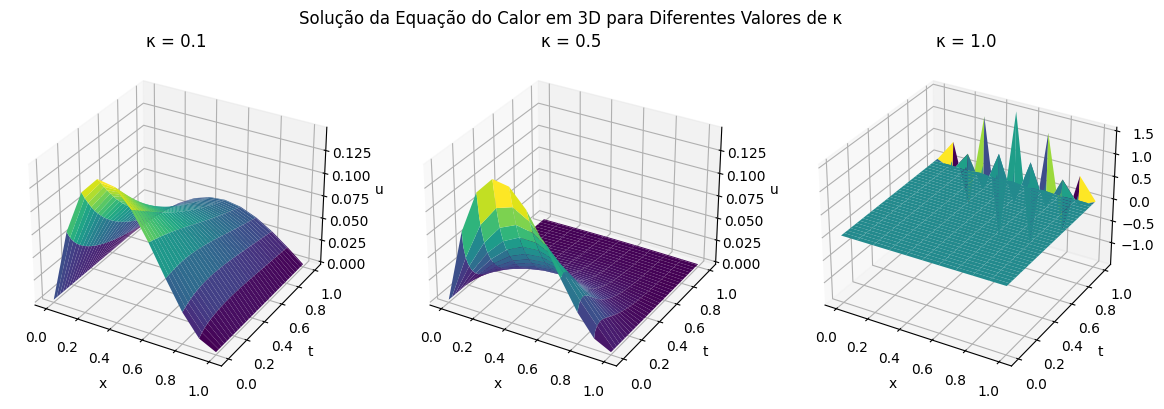

In [44]:
def equacao_calor_explicita_3d(κ, dx, dt, u_initial, passos_no_tempo):
    """
    Resolve numericamente a equação do calor unidimensional usando o método explícito das diferenças finitas.
    
    Args:
        κ (float): Coeficiente de difusão.
        dx (float): Passo no espaço.
        dt (float): Passo de tempo.
        u_initial (numpy.ndarray): Condição inicial como um array numpy.
        passos_no_tempo (int): Número de passos de tempo.
        
    Returns:
        numpy.ndarray: Array contendo a solução da equação do calor.
    """
    # Calcula o número de pontos na malha
    num_points = len(u_initial)
    
    # Calcula o valor de alpha
    alpha = κ * dt / (dx**2)
    
    # Cria um array para armazenar a solução
    u_solution = np.zeros((passos_no_tempo + 1, num_points))
    u_solution[0] = u_initial
    
    # Loop para a resolução da equação do calor
    for n in range(passos_no_tempo):
        for i in range(1, num_points - 1):
            u_solution[n+1, i] = alpha * u_solution[n, i+1] + (1 - 2*alpha) * u_solution[n, i] + alpha * u_solution[n, i-1]
        u_solution[n+1, 0] = 0
        u_solution[n+1, -1] = 0
    
    return u_solution

# Parâmetros do problema
dx = 0.1
dt = 0.01
passos_no_tempo = 100

# Condição inicial
x = np.arange(0, 1 + dx, dx)
u_initial = x * (1 - x)**2

# Valores diferentes de κ
'''Essa lista contém os valores diferentes do coeficiente de difusão κ que serão comparados.'''
κ_values = [0.1, 0.5, 1.0]

# Resolução da equação do calor para cada valor de κ
u_solutions = []
for κ in κ_values:
    u_solution =  equacao_calor_explicita_3d(κ, dx, dt, u_initial, passos_no_tempo)
    u_solutions.append(u_solution)

# Criação do grid de pontos para o gráfico 3D

'''As variáveis T e X são criadas usando a função meshgrid do numpy, que cria um grid de pontos a partir dos arrays
np.linspace(0, 1, num_steps+1) (representando o eixo temporal) e x (representando o eixo espacial).'''
T, X = np.meshgrid(np.linspace(0, 1, passos_no_tempo+1), x)

# Criação dos gráficos 3D
'''O código cria uma figura com três subplots, cada um correspondendo a um valor diferente de κ.'''
fig = plt.figure(figsize=(12, 4))
for i, κ in enumerate(κ_values):
    ax = fig.add_subplot(1, 3, i+1, projection='3d')
    ax.plot_surface(X.T, T.T, u_solutions[i], cmap='viridis')
    ax.set_xlabel('x')
    ax.set_ylabel('t')
    ax.set_zlabel('u')
    ax.set_title(f'κ = {κ}')
    
'''O método plot_surface é usado para traçar a superfície 3D, com os eixos X.T, T.T e u_solutions[i] 
correspondentes ao eixo espacial, temporal e valores da solução, respectivamente.'''

   

# Configurações gerais
fig.suptitle('Solução da Equação do Calor em 3D para Diferentes Valores de κ')
plt.tight_layout()
plt.show()

## `Explicação teórica`

O código apresentado e a análise da equação do calor têm o objetivo de resolver numericamente a equação do calor unidimensional e fornecer uma representação visual da solução. A partir disso, algumas interpretações podem ser feitas:

    1. Evolução temporal da temperatura: O gráfico 3D gerado mostra como a temperatura em uma barra unidimensional varia ao longo do tempo. A dimensão do eixo horizontal representa a posição na barra, o eixo vertical representa o tempo e a temperatura é representada pelo eixo de profundidade (terceira dimensão). Através da visualização do gráfico, é possível observar como a temperatura se propaga e se distribui na barra ao longo do tempo.

    2. Difusão de calor: A equação do calor descreve a difusão do calor em um meio, e a solução numérica obtida representa essa difusão. É possível observar como o calor se espalha e se propaga na barra ao longo do tempo, partindo da condição inicial e seguindo a evolução temporal.

    3. Influência do coeficiente de difusão: O coeficiente de difusão κ é um parâmetro que determina a taxa de difusão do calor na equação do calor. Ao modificar o valor de κ, é possível observar como a velocidade e a taxa de difusão do calor são afetadas. Valores maiores de κ resultam em uma maior taxa de difusão, enquanto valores menores de κ resultam em uma difusão mais lenta.

    4. Importância do método numérico: O uso do método das diferenças finitas, seja ele explícito ou implícito, permite obter uma aproximação numérica da solução da equação do calor. O código mostra a implementação prática de um desses métodos e destaca a importância de escolher o método apropriado para garantir a estabilidade numérica e a precisão dos resultados.

Em suma, o código e a análise da equação do calor fornecem uma visão prática da difusão do calor em um meio unidimensional, permitindo uma compreensão melhor das propriedades do problema e das características da solução.

## 🔢| Equação da Advecção

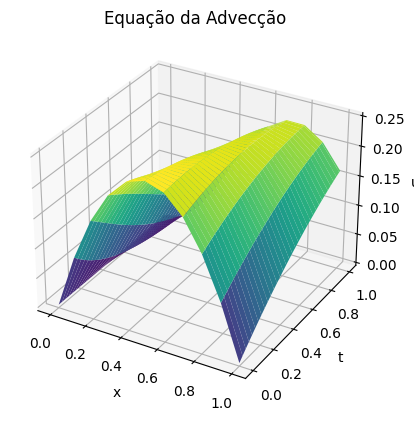

In [33]:
import numpy as np
import matplotlib.pyplot as plt

def equacao_advecção(μ, dx, dt, condição_inicial, passos_no_tempo):
    """
    Resolve numericamente a equação da advecção unidimensional usando o método das diferenças finitas.
    
    Args:
        μ (float): Coeficiente de advecção.
        dx (float): Passo espacial.
        dt (float): Passo de tempo.
        condição_inicial (numpy.ndarray): Condição inicial como um array numpy.
        passos_no_tempo (int): Número de passos de tempo.
        
    Returns:
        numpy.ndarray: Array contendo a solução da equação da advecção.
    """
    # Calcula o número de pontos na malha
    num_points = len(condição_inicial)
    
    # Calcula o valor de sigma
    sigma = μ * dt / dx
    
    # Cria um array para armazenar a solução
    solução = np.zeros((passos_no_tempo + 1, num_points))
    solução[0] = condição_inicial
    
    # Loop para a resolução da equação da advecção
    for n in range(passos_no_tempo):
        for i in range(1, num_points):
            solução[n+1, i] = solução[n, i] - sigma * (solução[n, i] - solução[n, i-1])
    
    return solução

# Parâmetros do problema
dx = 0.1
dt = 0.01
passos_no_tempo = 100

# Condição inicial
x = np.arange(0, 1 + dx, dx)
condição_inicial = x * (1 - x)

# Valor de μ
μ = 0.25

# Resolução da equação da advecção
solução = equacao_advecção(μ, dx, dt, condição_inicial, passos_no_tempo)

# Criação do grid de pontos para o gráfico
T, X = np.meshgrid(np.linspace(0, 1, passos_no_tempo+1), x)

# Plotagem do gráfico 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X.T, T.T, solução, cmap='viridis')
ax.set_xlabel('x')
ax.set_ylabel('t')
ax.set_zlabel('u')
ax.set_title('Equação da Advecção')
plt.show()

## `Explicação Teórica`

A equação da advecção é uma equação diferencial parcial que descreve a propagação de uma quantidade conservada em um fluxo advectivo. Ela é dada pela seguinte forma:

$ut + μux = 0$

Nessa equação, u(x, t) é a função desconhecida que representa a quantidade a ser advectada, t é a variável temporal, x é a variável espacial e μ é o coeficiente de advecção. A equação representa a taxa de variação temporal da função u somada à taxa de variação espacial de u multiplicada pelo coeficiente de advecção μ.

A solução da equação da advecção depende da condição inicial u(x, 0) e da condição de contorno u(0, t) e u(1, t). A condição inicial define o estado inicial da função u no tempo t = 0, enquanto as condições de contorno definem os valores de u nas extremidades do domínio espacial.

Para resolver numericamente a equação da advecção usando o método das diferenças finitas, o domínio espacial é discretizado em pontos equidistantes ao longo do eixo x, e o domínio temporal é discretizado em passos de tempo. A função u é aproximada em cada ponto espacial e em cada instante de tempo.

O método das diferenças finitas aproxima as derivadas espaciais e temporais da equação da advecção usando diferenças finitas. Por exemplo, a derivada espacial ux é aproximada pela diferença finita central:

$ux ≈ (u(i+1, n) - u(i-1, n)) / (2Δx)$

onde i representa o índice do ponto espacial e n representa o índice do passo de tempo.

A derivada temporal ut é aproximada pela diferença finita progressiva:

$ut ≈ (u(i, n+1) - u(i, n)) / Δt$

onde Δt é o passo de tempo.

Substituindo essas aproximações na equação da advecção, obtemos uma equação discreta que relaciona os valores de u nos pontos espaciais e nos passos de tempo subsequentes.

Aplicando essa equação discretizada iterativamente para cada ponto espacial e em cada passo de tempo, podemos calcular a evolução temporal da função u ao longo do domínio espacial.

No código fornecido anteriormente, a função `equacao_advecção` implementa essa abordagem. Ela recebe os parâmetros μ, dx, dt, condição_inicial e passos_no_tempo, e retorna a solução numérica da equação da advecção.

A solução numérica é então plotada em um gráfico 3D, onde o eixo x representa a coordenada espacial, o eixo t representa o tempo e o eixo u representa os valores da função u.

Espero que essa explicação teórica ajude a compreender o conceito por trás da equação da advecção e da sua resolução numérica utilizando o método das diferenças finitas.